#### Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Functions

In [30]:
def graf(x, y, color = "r--", title = "Gráfico", show = True, grid = True):
  plt.plot(x, y, color)
  plt.title(title)
  
  if grid:
    plt.grid()
  if show:
    plt.show()

In [11]:
def boxplot(dado, title = "", show = True):
  plt.boxplot(dado)
  plt.title("Boxplot " + title, fontsize = 14)
  if show:
    plt.show()

In [12]:
def histograma(dado, title = "", show = True):
  plt.hist(dado)
  plt.title("Histograma " + title, fontsize = 14)
  if show:
    plt.show()

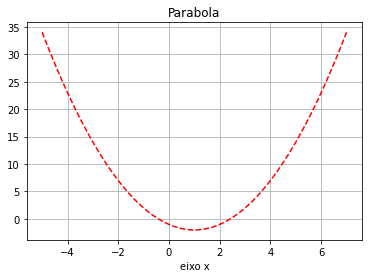

In [29]:
x = np.arange(-5, 7.1, 0.1)
y = x**2 -2 *x -1

graf(x,y, title = "Parabola", show = False, grid = True)
plt.xlabel("eixo x")
plt.show()

#### Data

In [ ]:
df = pd.read_csv("/content/all_perth_310121.csv")

In [ ]:
df.head(2)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.11590,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.19347,115.859554,ATWELL COLLEGE,5.524324,129.0


In [31]:
df_new = df[["PRICE", "BEDROOMS", "BATHROOMS", "GARAGE", "LAND_AREA", "FLOOR_AREA", "BUILD_YEAR"]]

In [32]:
df_new.head(3)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,565000,4,2,2.0,600,160,2003.0
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0


In [34]:
# Tirar os valores faltantes e reiniciar o index

df_new.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [36]:
df_new.shape

(28256, 7)

In [37]:
# Reiniciar o index
df_new.reset_index(inplace = True, drop = True)

In [38]:
df_new.head(3)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,565000,4,2,2.0,600,160,2003.0
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0


In [39]:
df_new.tail()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
28251,423000,3,2,2.0,248,108,2011.0
28252,467000,4,2,2.0,400,132,2014.0
28253,955000,3,2,1.0,200,127,1997.0
28254,1040000,4,3,2.0,292,245,2013.0
28255,295000,3,1,2.0,457,85,1974.0


##### Salvar o dataset

In [40]:
df_new.to_csv("/content/datasets/df_new.csv")

In [42]:
df_sem_out = df_new[df_new.PRICE < 1000000]
df_sem_out.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,565000,4,2,2.0,600,160,2003.0
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0
3,255000,2,1,2.0,651,59,1953.0
4,325000,4,1,2.0,466,131,1998.0


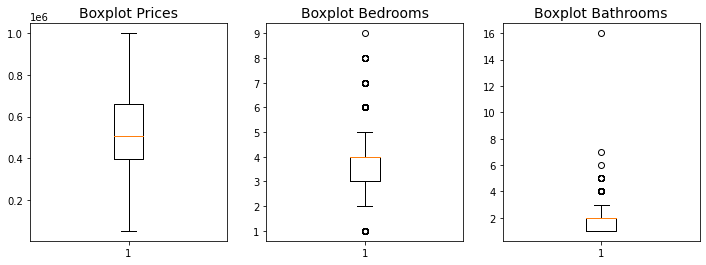

In [47]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
boxplot(df_sem_out.PRICE, "Prices", show = False)
plt.subplot(1, 3, 2)
boxplot(df_sem_out.BEDROOMS, "Bedrooms", show = False)
plt.subplot(1, 3, 3)
boxplot(df_sem_out.BATHROOMS, "Bathrooms", show = False)

##### Filtrando coisas

In [48]:
df_sem_out.head(3)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,565000,4,2,2.0,600,160,2003.0
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0


In [50]:
# Usando a Função ISIN para verificar quais linhas na columa BEDROOMS tem 2.

df_sem_out['BEDROOMS'].isin([2])
lista = df_sem_out['BEDROOMS'].isin([2])

In [52]:
# Criar um df com apenas casas e aptos com 2 quartos

df_two_bedrooms = df_sem_out[lista]

In [53]:
df_two_bedrooms.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
3,255000,2,1,2.0,651,59,1953.0
18,318000,2,1,3.0,751,90,1959.0
63,85000,2,1,2.0,828,117,1965.0
129,660000,2,2,2.0,376,100,1962.0
157,83000,2,1,2.0,935,100,1959.0


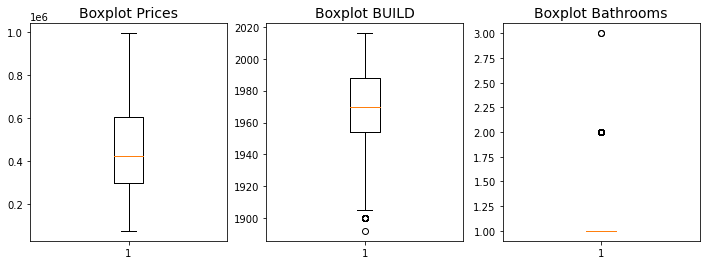

In [59]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
boxplot(df_two_bedrooms.PRICE, title = "Prices", show = False)
plt.subplot(1, 3, 2)
boxplot(df_two_bedrooms.BUILD_YEAR, title = "BUILD", show = False)
plt.subplot(1, 3, 3)
boxplot(df_two_bedrooms.BATHROOMS, "Bathrooms", show = False)

(array([ 27.,  51., 136., 138., 166., 110.,  90.,  70.,  52.,  52.,  48.,
         36.,  22.]),
 array([ 77000.        , 147615.38461538, 218230.76923077, 288846.15384615,
        359461.53846154, 430076.92307692, 500692.30769231, 571307.69230769,
        641923.07692308, 712538.46153846, 783153.84615385, 853769.23076923,
        924384.61538462, 995000.        ]),
 <a list of 13 Patch objects>)

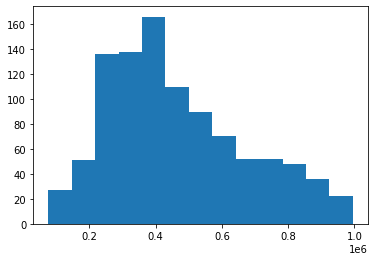

In [65]:
plt.hist(df_two_bedrooms.PRICE, bins = 13)

In [58]:
# Filtrar casas e aptos com 03

lista = df_sem_out["BEDROOMS"].isin([3])

df_three_bedrooms = df_sem_out[lista]

df_three_bedrooms.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0
6,400000,3,2,2.0,386,132,2014.0
9,685000,3,2,8.0,552,126,1999.0
11,367500,3,2,2.0,398,158,2003.0


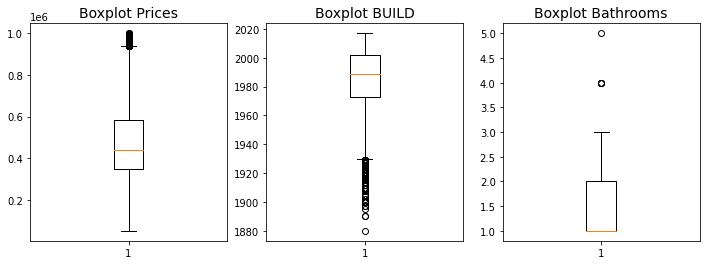

In [60]:
plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
boxplot(df_three_bedrooms.PRICE, title = "Prices", show = False)
plt.subplot(1, 3, 2)
boxplot(df_three_bedrooms.BUILD_YEAR, title = "BUILD", show = False)
plt.subplot(1, 3, 3)
boxplot(df_three_bedrooms.BATHROOMS, "Bathrooms", show = False)